## Simulating Stock Price Paths

We assume the continuously compounded returns are normally distributed with mean $(\alpha - \delta - \frac{1}{2}\sigma^2)t$ and variance $\sigma^2t$ i.e.
$$\ln\left(\frac{S_t}{S_0}\right)  \sim \mathcal{N}\left((\alpha - \delta - \frac{1}{2}\sigma^2)t, \sigma^2t\right) = (\alpha - \delta - \frac{1}{2}\sigma^2) t + \sigma\sqrt{t}Z$$

where $Z \sim \mathcal{N}(0,1)$

So, the stock price $S_t$ is given by
$$S_t = S_0 e^{(\alpha - \delta -1/2 \sigma^2)t + \sigma\sqrt{t}Z}$$

To simulate the stock price, we will assume small time steps of length $h$.  Following this [note](http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-sim-BM.pdf) we will simulate the stock price for $n$ steps as follows:

- We create a vector $\vec{Z} = (Z_1, Z_2, \ldots, Z_n)$ where each $Z_i$ is a sample from a standard normal rv
- Our path will be the prices $S_0, S_h, S_{2h}, \ldots, S_{nh}$
- If we set $X_t = ln(S_t/S_0)$ then $X_t \sim \mathcal{N}((\alpha-\delta-\frac{1}{2}\sigma^2)t, \sigma^2t)$
- We first find the path $X_0, X_h, X_{2h}, \ldots, X_{nh}$ and then $S_{ih} = e^{X_{ih}}$
- First, $X_0 = ln(S_0)$
- Given $X_{ih}$ we use the fact that $X_{(i+1)j} - X_{ih} \sim \mathcal{N}((\alpha-\delta-\frac{1}{2}\sigma^2)h, \sigma^2h)$
- So, $X_{(i+1)h} - X_{ih} = (\alpha-\delta-\frac{1}{2}\sigma^2)h+ \sigma\sqrt{h}Z_{i+1}$ (the $Z$s are standard normal)
- Using this, $X_{(i+1)h} = X_{ih} + (\alpha-\delta-\frac{1}{2}\sigma^2)h+ \sigma\sqrt{h}Z_{i+1}$
- Then, writing $\exp(x)$ for $e^x$,
$$S_{(i+1)h} = \exp({X_{(i+1)h}}) = \exp({X_{ih} + (\alpha-\delta-\frac{1}{2}\sigma^2)h+ \sigma\sqrt{h}Z_{i+1}}) = S_{ih} \exp({(\alpha-\delta-\frac{1}{2}\sigma^2)h+ \sigma\sqrt{h}Z_{i+1}})$$



In the below code, `T` represents the total time/length of the simulation (in years) and `n` represents the number of periods/steps the simulation will have.  The variables `alpha`, `delta`, `sigma` and `S0` should be self-explanatory.  Try editing those values!  After you edit, you will most likely need to rerun the codeblock, which you can do with `Ctrl - R`.

In [2]:
using Plots

In [3]:
alpha = 0.20     
delta = 0.02
sigma = 0.3
S0 = 100.0
T = 1         
n = 1000;     

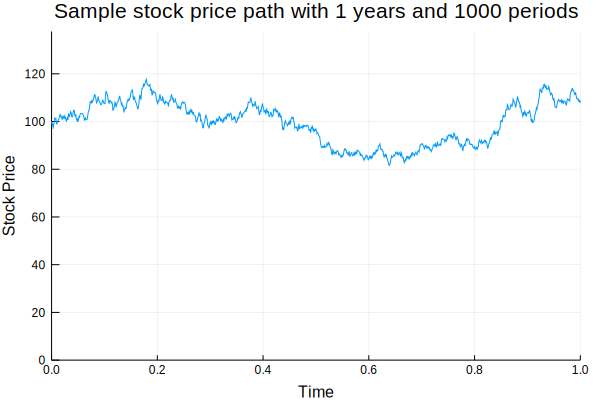

In [4]:
h = T / n

# Zs is a vector of n draws from a standard normal variable
Zs = randn(n)
prices = Array{Float64}(n+1)

prices[1] = S0

for i in 1:n
    #this is X_(i+1)h in the above formula
    logReturn = (alpha - delta - 1/2 * sigma^2)*h + sigma * sqrt(h) * Zs[i]
    
    #get the next price using the above formula
    prices[i+1] = prices[i] * exp(logReturn)
end

times = [i*h for i in 0:n]
plot(times, prices)
plot!(title= "Sample stock price path with $T years and $n periods", ylabel= "Stock Price", xlabel="Time", legend=false)
plot!(ylim=[0, maximum(prices)+20])

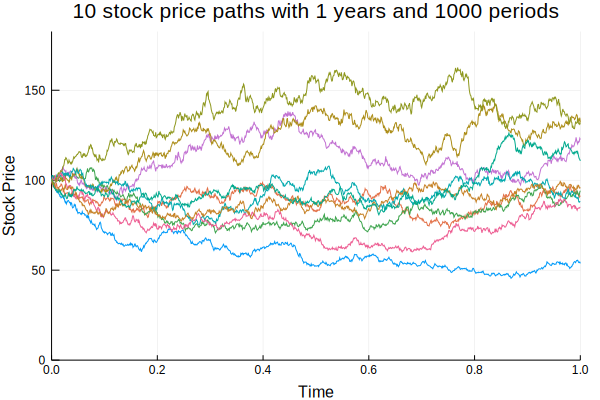

In [16]:
#Now do it with more paths
numSims = 10

p = plot(title= "$numSims stock price paths with $T years and $n periods", ylabel= "Stock Price", xlabel="Time", legend=false)
maxPrice = 0

for s in 1:numSims
    Zs = randn(n)
    prices = Array{Float64}(n+1)

    prices[1] = S0

    for i in 1:n
        #this is X_(i+1)h in the above formula
        logReturn = (alpha - delta - 1/2 * sigma^2)*h + sigma * sqrt(h) * Zs[i]

        #get the next price using the above formula
        prices[i+1] = prices[i] * exp(logReturn)
    end

    #keep track of the maximum price (just to make the graph look better)
    mp = maximum(prices)
    maxPrice = (mp > maxPrice) ? mp : maxPrice
    
    times = [i*h for i in 0:n]
    plot!(p, times, prices)
end

plot!(ylim=[0, maxPrice + 20])